<center>
    
<h2>BÀI TEST SỐ 1 </h2>
    
</center>
 
---
**Thông tin sinh viên:**
1. Họ tên SV: Nguyễn Văn Phú
2. Mã Sinh viên: 2121050443
3. Lớp: DCCTCT66_07D
4. Nhóm môn học: 7080510_KHMT65B_04

---



# A. Mô tả tập dữ liệu
Tập dữ liệu Data_Diabetes.csv bao gồm kết quả xét nghiệm bệnh tiểu đường của 723
bệnh nhân toàn bộ là nữ giới. Mỗi bản ghi tương ứng với một bệnh nhân, bao gồm 9 thuộc 
tính:
1. Pregnancies: Số lần mang thai
2. Glucose: Chỉ số Gluco 
3. BloodPressur: Huyết áp (đơn vị: mm Hg)
4. SkinThickness: Mức độ dày da (đơn vị: mm)
5. Insulin: Chỉ số Insulin (đơn vị: mu U/ml)
6. BMI: Chỉ số BMI của cơ thể (được tính bằng = Cân nặng / chiều cao2
)
7. DiabetesPedigreeFunction: Chức năng phả hệ của bệnh tiểu đường
8. Age: Tuổi
9. Outcome: Thuộc tính cho biết bệnh nhân có mắc bệnh tiểu đường hay không?
    * Không bị tiểu đường (0)
    * Bị tiểu đường (1)

In [1]:
#Gọi các thư viện sử dụng
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#-----------
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)#Gọi các thư viện sử dụng
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#-----------
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

## 1. Đọc file dữ liệu, quan sát dữ liệu và các đặc trưng thống kê của tập dữ liệu

In [2]:
df = pd.read_csv('Data_Diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               723 non-null    int64  
 1   Glucose                   723 non-null    int64  
 2   BloodPressure             723 non-null    int64  
 3   SkinThickness             723 non-null    float64
 4   Insulin                   723 non-null    float64
 5   BMI                       723 non-null    float64
 6   DiabetesPedigreeFunction  723 non-null    float64
 7   Age                       723 non-null    int64  
 8   Outcome                   723 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 51.0 KB


In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,126.0,33.6,0.627,50,1
1,1,85,66,29.0,126.0,26.6,0.351,31,0
2,8,183,64,29.0,126.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
718,10,101,76,48.0,180.0,32.9,0.171,63,0
719,2,122,70,27.0,126.0,36.8,0.340,27,0
720,5,121,72,23.0,112.0,26.2,0.245,30,0
721,1,126,60,29.0,126.0,30.1,0.349,47,1


In [4]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
416,8,108,70,29.0,126.0,30.5,0.955,33,1
573,7,168,88,42.0,321.0,38.2,0.787,40,1
259,2,100,70,52.0,57.0,40.5,0.677,25,0
455,0,135,68,42.0,250.0,42.3,0.365,24,1
92,1,163,72,29.0,126.0,39.0,1.222,33,1


In [5]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,126.0,33.6,0.627,50,1
1,1,85,66,29.0,126.0,26.6,0.351,31,0
2,8,183,64,29.0,126.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1


In [6]:
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
718,10,101,76,48.0,180.0,32.9,0.171,63,0
719,2,122,70,27.0,126.0,36.8,0.340,27,0
720,5,121,72,23.0,112.0,26.2,0.245,30,0
721,1,126,60,29.0,126.0,30.1,0.349,47,1
722,1,93,70,31.0,126.0,30.4,0.315,23,0


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,3.869986,121.928077,72.467497,29.147994,142.435685,32.473582,0.474649,33.367911,0.344398
std,3.363438,30.746940,12.256605,9.017616,88.624795,6.891518,0.332530,11.764549,0.475501
min,0.000000,44.000000,30.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,25.000000,119.500000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,126.000000,32.400000,0.378000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,131.000000,36.600000,0.628000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


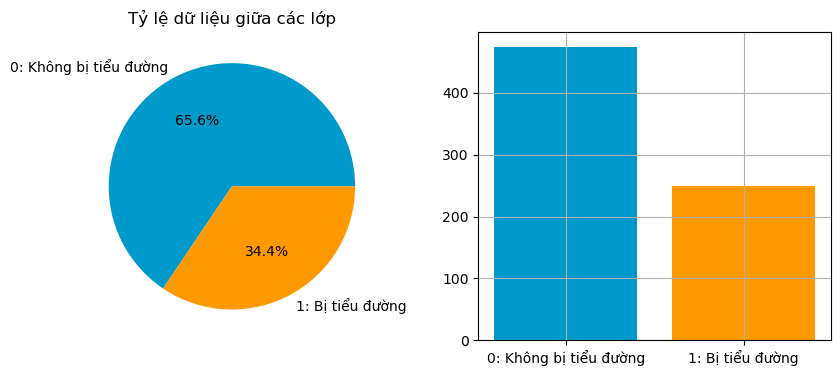

In [8]:
#Kiểm tra cân bằng dữ liệu
check = df['Outcome'].value_counts()

#Trực quan hoá dữ liệu bằng biểu đồ
label = ['0: Không bị tiểu đường','1: Bị tiểu đường']

plt.figure(figsize=(10,4))
#Vẽ biểu đồ tròn:
plt.subplot(1,2,1)
plt.pie(check.values, labels = label,
       autopct='%.1f%%',colors=['#0099CC','#FF9900'])
plt.title('Tỷ lệ dữ liệu giữa các lớp')

#Vẽ biểu đồ cột:
plt.subplot(1,2,2)
plt.bar(label, check.values,
       color=['#0099CC','#FF9900'])
plt.grid()
plt.show()

### NHẬN XÉT: Tập dữ liệu bị mất cân bằng nhẹ giữa 2 lớp đầu ra
* Lớp 0 - Bệnh nhân không bị tiểu đường khoảng 65.6%
* Lớp 1 - Bệnh nhân bị tiểu đường khoảng 34.4%

**Dữ liệu mất cân bằng nhẹ --> Cần phải xử lý cân bằng dữ liệu**

---

## 2. Cân bằng dữ liệu 

Phân tách các biến Độc lập (X) - Phụ thuộc (Y) tương ứng
* Biến Độc lập X - 8 thuộc tính: 
    * Pregnancies	
    * Glucose	
    * BloodPressure	
    * SkinThickness	
    * Insulin	
    * BMI	
    * DiabetesPedigreeFunction	
    * Age	
* Biến phụ thuộc y - 1 thuộc tính: 
    * Outcome

In [9]:
#Tách biến X
X = df.loc[:,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
print('Kích thước biến X: ', X.shape)

Kích thước biến X:  (723, 8)


In [10]:
#Tách biến y
y = df.loc[:, 'Outcome'].values
print('Kích thước biến y: ', y.shape)

Kích thước biến y:  (723,)


In [11]:
from imblearn.over_sampling import RandomOverSampler
#Sử dụng RandomOverSampler để cân bằng dữ liệu
#Tham số sampling_strategy (0,1] thiết lập tỷ lệ Under_sampling lớp thiểu số với lớp đa số
under = RandomOverSampler(sampling_strategy=0.8)
X11, y11 = under.fit_resample(X, y)

counter11 = Counter(y11)
print(counter11)

Counter({0: 474, 1: 379})


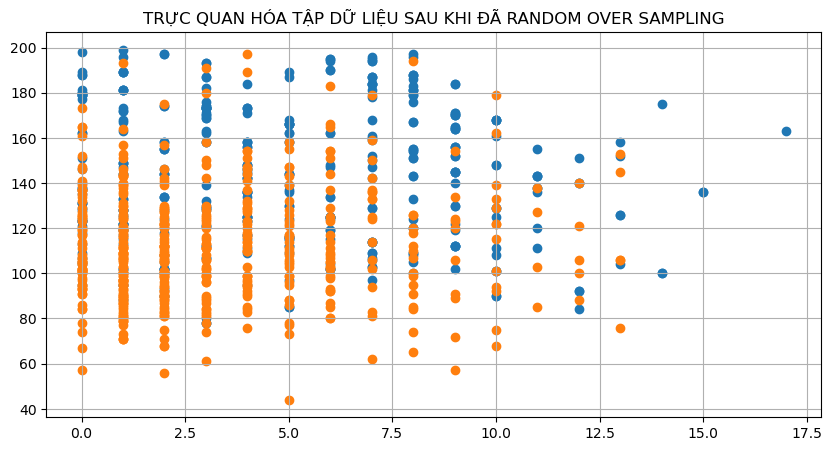

In [12]:
plt.figure(figsize=[10,5])
for label, _ in counter11.items():
    row_ix = np.where(y11 == label)[0]
    plt.scatter(X11[row_ix, 0], X11[row_ix, 1], label=str(label))
plt.grid(True)
plt.title('TRỰC QUAN HÓA TẬP DỮ LIỆU SAU KHI ĐÃ RANDOM OVER SAMPLING')
plt.show()

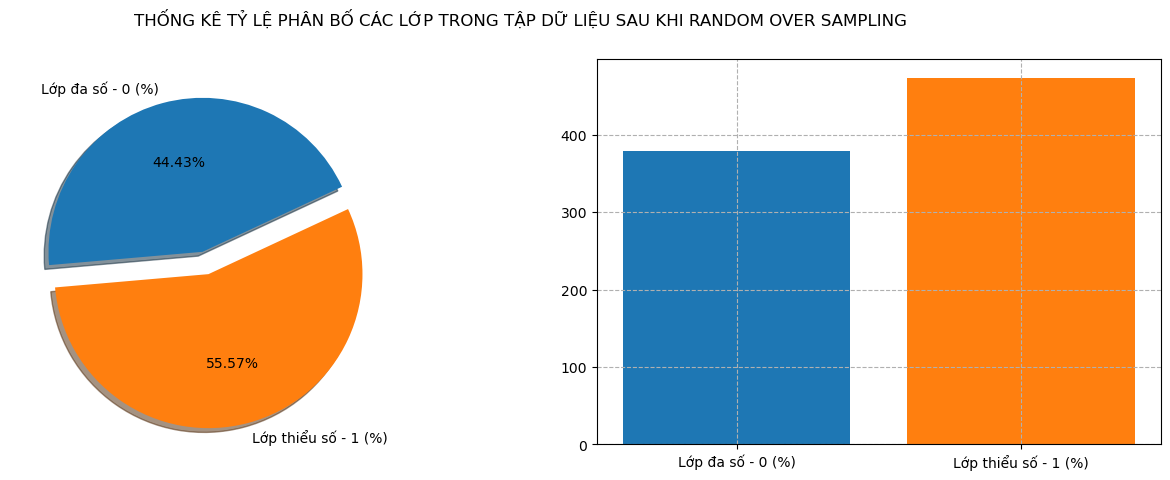

In [13]:
class_y = list(counter11.values())
labels ="Lớp đa số - 0 (%)", "Lớp thiểu số - 1 (%)"

#Trực quan hóa dữ liệu mỗi lớp trong tập dữ liệu sau cân bằng:
plt.figure(figsize=(16,5))
#Vẽ biểu đồ tròn thể hiện tỷ lệ & số lượng mẫu theo từng lớp:
plt.subplot(1,2,1)
plt.pie(class_y, explode=[0,0.15], autopct='%1.2f%%', shadow=True, 
                                             labels=labels, startangle=25, colors=['#1E77B4','#FF7F0F'])

#Vẽ biểu đồ cột thể hiện tổng số lượng mẫu theo từng lớp
plt.subplot(1,2,2)
plt.bar(labels, class_y,color=['#1E77B4','#FF7F0F'])
plt.grid(ls='--')
plt.suptitle('THỐNG KÊ TỶ LỆ PHÂN BỐ CÁC LỚP TRONG TẬP DỮ LIỆU SAU KHI RANDOM OVER SAMPLING', fontsize=12)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X11,y11,
                                                   train_size = 0.8,
                                                   shuffle = True)
print('Tổng số mẫu trong tập dữ liệu: ', len(y11))
print('Số mẫu X trong tập Train: ', len(X_train))
print('Số mẫu y trong tập Train: ', len(y_train))
print('Số mẫu X trong tập Test: ', len(X_test))
print('Số mẫu y trong tập Test: ', len(y_test))

Tổng số mẫu trong tập dữ liệu:  853
Số mẫu X trong tập Train:  682
Số mẫu y trong tập Train:  682
Số mẫu X trong tập Test:  171
Số mẫu y trong tập Test:  171


In [15]:
print(X_test)
print(y_test)

[[  1.     88.     62.    ...  29.9     0.422  23.   ]
 [  1.    124.     60.    ...  35.8     0.514  21.   ]
 [ 12.     88.     74.    ...  35.3     0.378  48.   ]
 ...
 [  0.    114.     80.    ...  44.2     0.167  27.   ]
 [  0.    140.     65.    ...  42.6     0.431  24.   ]
 [  8.    100.     76.    ...  38.7     0.19   42.   ]]
[0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1
 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0
 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1
 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0]


In [16]:
#Gọi thư viện sklearn với thuật toán phân lớp KNN
from sklearn.neighbors import KNeighborsClassifier

#Khai báo model KNN sử dụng các tham số mặc định
KNN_sugar = KNeighborsClassifier(n_neighbors = 5)

#Hiển thị danh sách tham số: Model.get_params()
KNN_sugar.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [17]:
#Thực hiện huấn luyện với dữ liệu tập train: Model.fit(X_train, y_train)
KNN_sugar.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
#Độ chính xác của model trên tập huấn luêynj: model.score(X_train, y_train)
acc_train = KNN_sugar.score(X_train, y_train)
print('Độ chính xác trên tập huấn luyện: ', acc_train)
print('Độ chính xác % trên tập huấn luyện: ', round(acc_train*100,2))


Độ chính xác trên tập huấn luyện:  0.8049853372434017
Độ chính xác % trên tập huấn luyện:  80.5


In [19]:
counter = Counter(y)
print(counter)

Counter({0: 474, 1: 249})


In [20]:
# Sử dụng Phương pháp SMOTE để sinh thêm mẫu cho tập thiểu số
from imblearn.over_sampling import SMOTE
# Tham số sampling_strategy thiết lập tỷ lệ tạo mẫu của tập thiểu số với tập đa số
# Tham số k_neighbors thiết lập số mẫu láng giềng gần nhất sử dụng để sinh mẫu
oversample = SMOTE(sampling_strategy=0.9, 
                   k_neighbors=8)
X12, y12 = oversample.fit_resample(X, y)

counter12 = Counter(y12)
print(counter12)

Counter({0: 474, 1: 426})


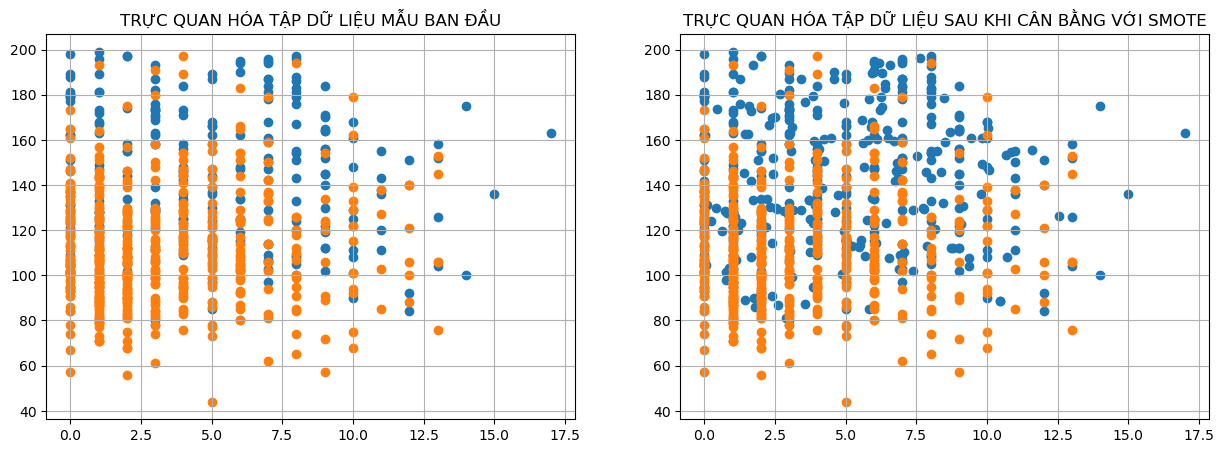

In [21]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.grid(True)
plt.title('TRỰC QUAN HÓA TẬP DỮ LIỆU MẪU BAN ĐẦU')

plt.subplot(1,2,2)
for label, _ in counter12.items():
	row_ix = np.where(y12 == label)[0]
	plt.scatter(X12[row_ix, 0], X12[row_ix, 1], label=str(label))
plt.grid(True)
plt.title('TRỰC QUAN HÓA TẬP DỮ LIỆU SAU KHI CÂN BẰNG VỚI SMOTE')

plt.show()

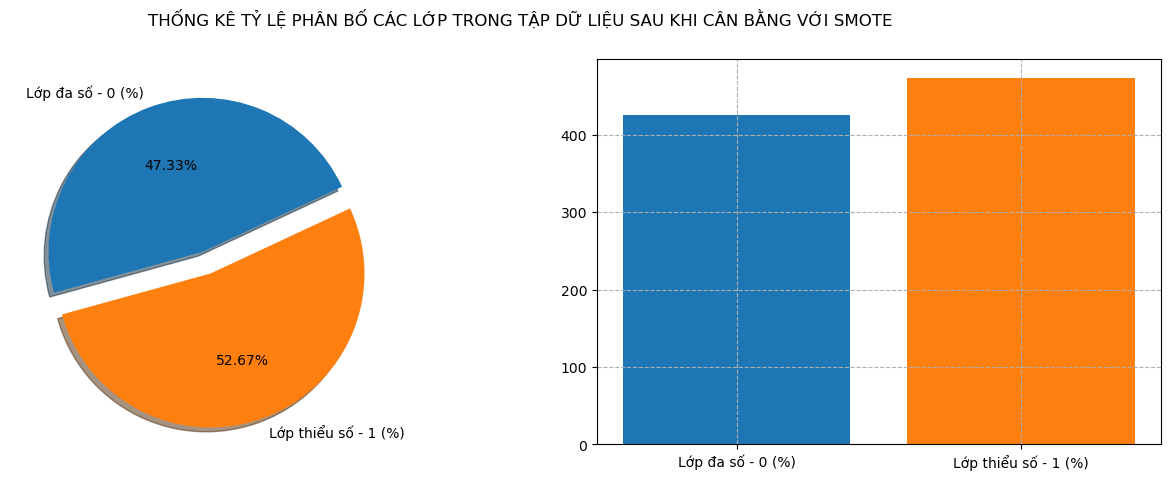

In [22]:
class_y = list(counter12.values())
labels ="Lớp đa số - 0 (%)", "Lớp thiểu số - 1 (%)"

#Trực quan hóa dữ liệu mỗi lớp trong tập dữ liệu sau cân bằng:
plt.figure(figsize=(16,5))
#Vẽ biểu đồ tròn thể hiện tỷ lệ & số lượng mẫu theo từng lớp:
plt.subplot(1,2,1)
plt.pie(class_y, explode=[0,0.15], autopct='%1.2f%%', shadow=True, 
                                             labels=labels, startangle=25, colors=['#1E77B4','#FF7F0F'])

#Vẽ biểu đồ cột thể hiện tổng số lượng mẫu theo từng lớp
plt.subplot(1,2,2)
plt.bar(labels, class_y,color=['#1E77B4','#FF7F0F'])
plt.grid(ls='--')
plt.suptitle('THỐNG KÊ TỶ LỆ PHÂN BỐ CÁC LỚP TRONG TẬP DỮ LIỆU SAU KHI CÂN BẰNG VỚI SMOTE', fontsize=12)
plt.show()

## 3. Chia tập dữ liệu thành 2 phần Train - Test

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X12,y12,
                                                   train_size = 0.77,
                                                   shuffle = True)
print('Tổng số mẫu trong tập dữ liệu: ', len(y12))
print('Số mẫu X trong tập Train: ', len(X_train))
print('Số mẫu y trong tập Train: ', len(y_train))
print('Số mẫu X trong tập Test: ', len(X_test))
print('Số mẫu y trong tập Test: ', len(y_test))

Tổng số mẫu trong tập dữ liệu:  900
Số mẫu X trong tập Train:  693
Số mẫu y trong tập Train:  693
Số mẫu X trong tập Test:  207
Số mẫu y trong tập Test:  207


In [24]:
#Gọi thư viện sklearn với thuật toán phân lớp KNN
from sklearn.neighbors import KNeighborsClassifier

#Khai báo model KNN sử dụng các tham số mặc định
KNN_sugar = KNeighborsClassifier(n_neighbors =5)

#Hiển thị danh sách tham số: Model.get_params()
KNN_sugar.get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [25]:
#Thực hiện huấn luyện với dữ liệu tập train: Model.fit(X_train, y_train)
KNN_sugar.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
#Độ chính xác của model trên tập huấn luêynj: model.score(X_train, y_train)
acc_train = KNN_sugar.score(X_train, y_train)
print('Độ chính xác trên tập huấn luyện: ', acc_train)
print('Độ chính xác % trên tập huấn luyện: ', round(acc_train*100,2))


Độ chính xác trên tập huấn luyện:  0.8210678210678211
Độ chính xác % trên tập huấn luyện:  82.11


In [27]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test: model.predict(X_test)
y_pred = KNN_sugar.predict(X_test)

In [28]:
#Kết quả dự đoán của mô hình trên tập test:
print(y_pred)
print(y_pred.shape)

[1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0
 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0
 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0
 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0
 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1]
(207,)


In [29]:
#So sánh kết quả dự đoán với kết quả thật cho 20 bệnh nhân đầu tiên:
print('Kết quả thật: ', y_test[:20])
print('Kết quả đoán: ', y_pred[:20])

Kết quả thật:  [1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0]
Kết quả đoán:  [1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0]


In [30]:
#Import module accuracy_score trong thư viện sklearn.metrics để đánh giá độ chính xác:
from sklearn.metrics import accuracy_score

#1.Đếm tổng số mẫu dự đoán đúng trên tập test: normalize=False
acc_test1 = accuracy_score(y_test, y_pred, normalize = False)
print('Tổng số mẫu dự đoán đúng: ', acc_test1, '/',len(y_test))

Tổng số mẫu dự đoán đúng:  153 / 207


In [31]:
#2. độc chính xác(accuracy) theo tỉ lệ %
# số mẫu dự đoán đúng/tổng số mẫu của tập test: normalize = True
acc_test2 = accuracy_score(y_test, y_pred, normalize = True)
print('Độ chính xác của mô hình trên tập test ', acc_test2)
print('Độ chính xác % của mô hình trên tập test ', round(acc_test2*100,2))

Độ chính xác của mô hình trên tập test  0.7391304347826086
Độ chính xác % của mô hình trên tập test  73.91


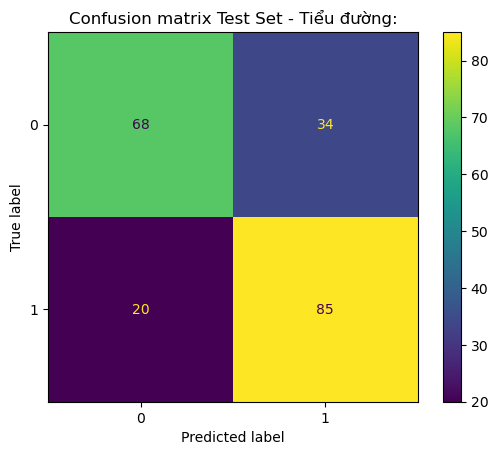

In [32]:
#3. sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Tính ma trận confusion matrix:
cnf_matrix_ungthu = confusion_matrix(y_test, y_pred)

#Hiển thị ma trận:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix Test Set - Tiểu đường:')
plt.show()